# Simplified Hubble Diagram

This is a tutorial exercise from the Sloan Digital Sky Survey (SDSS) website:

- [The Hubble Diagram](http://skyserver.sdss.org/dr14/en/proj/advanced/hubble/hubblehome.aspx)

In [1]:
# astropy imports - we can ignore the warning  :-)
# astroquery is one of 42 affiliated packages
from astropy import coordinates as coords
from astroquery.sdss import SDSS

/usr/lib/python3/dist-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [2]:
# general-purpose imports
import numpy as np
import pandas as pd
import sys

In [3]:
# this spreadsheet was uploaded from the SDSS tutorial site
# it has RA & Dec for 6 sample galaxies
fname = "exercise1.xls"
df = pd.read_excel(fname, encoding=sys.getfilesystemencoding())

In [4]:
df

Object ID         RA       Dec  Magnitude  Redshift
0          1237666408439939277  354.35000   0.39167        NaN       NaN
1          1237663784195195105  354.98998   0.13519        NaN       NaN
2          1237648704592806164  219.31858   0.17731        NaN       NaN
3          1237659895636296017  260.80622  58.58956        NaN       NaN
4          1237656529458233684  263.94885  54.36385        NaN       NaN
5          1237651800697274648  150.09651  -0.27059        NaN       NaN
6                          NaN        NaN       NaN        NaN       NaN
7                          NaN        NaN       NaN        NaN       NaN
8  What magnitude did you use?        NaN       NaN        NaN       NaN

In [5]:
# ignore rows without data
df.drop([6,7,8], axis=0, inplace=True)
df

Object ID         RA       Dec  Magnitude  Redshift
0  1237666408439939277  354.35000   0.39167        NaN       NaN
1  1237663784195195105  354.98998   0.13519        NaN       NaN
2  1237648704592806164  219.31858   0.17731        NaN       NaN
3  1237659895636296017  260.80622  58.58956        NaN       NaN
4  1237656529458233684  263.94885  54.36385        NaN       NaN
5  1237651800697274648  150.09651  -0.27059        NaN       NaN

In [6]:
# Fill in the 'Magnitude' column:
# look up observed magnitude in one of the 5 wavelengths available with SDSS
# Green (g) - 4770 Å
for index, row in df.iterrows():
    ra, dec = (row['RA'], row['Dec'])
    co = coords.SkyCoord(ra, dec, unit="deg")
    result = SDSS.query_crossid(co, photoobj_fields=['modelMag_g'])
    x = (result['modelMag_g'])
    print(index, x[0])
    df.loc[index,'Magnitude'] = x[0]

0 15.75727
1 16.25334
2 17.0536
3 17.8716
4 18.94336
5 20.13298


/usr/lib/python3/dist-packages/astroquery/sdss/core.py:856: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


In [7]:
# Fill in the 'Redshift' column
# to save time, look up redshifts with the SDSS GUI and fill in here
df['Redshift']=[0.009, 0.060, 0.105, 0.152, 0.238, 0.314]

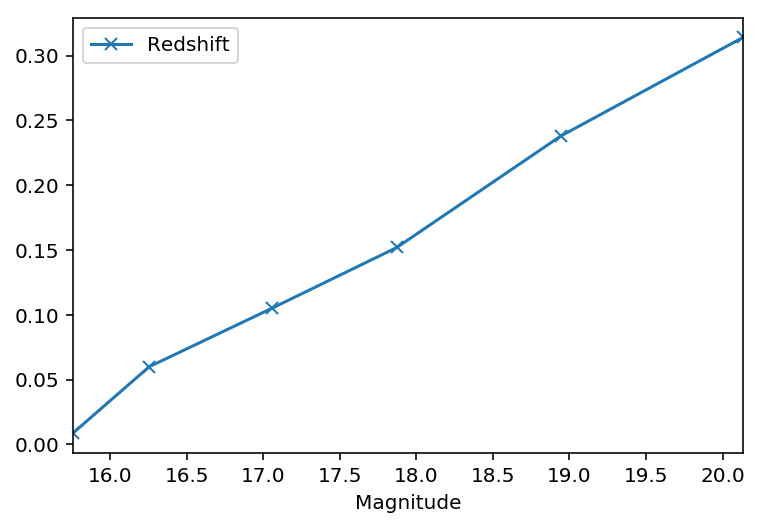

In [8]:
# using Magnitude as a proxy for distance, here's our first look at a Hubble-like plot
df.plot(x='Magnitude', y='Redshift', style='x-');

Flux is proportional to $2.51^{(-Magnitude)}$

In [9]:
# Add a column for Flux
df['Flux'] = df['Magnitude'].map(lambda x: 2.51**(-x))
df

Object ID         RA       Dec  Magnitude  Redshift          Flux
0  1237666408439939277  354.35000   0.39167   15.75727     0.009  5.037711e-07
1  1237663784195195105  354.98998   0.13519   16.25334     0.060  3.191296e-07
2  1237648704592806164  219.31858   0.17731   17.05360     0.105  1.528003e-07
3  1237659895636296017  260.80622  58.58956   17.87160     0.152  7.197657e-08
4  1237656529458233684  263.94885  54.36385   18.94336     0.238  2.684336e-08
5  1237651800697274648  150.09651  -0.27059   20.13298     0.314  8.982081e-09

Distance is proportional to $\frac{1}{\sqrt(Flux)}$

In [10]:
# Add a column for Relative Distance
import math
df['Relative Distance'] = df['Flux'].map(lambda x: 1/math.sqrt(x))
df

Object ID         RA       Dec  Magnitude  Redshift  \
0  1237666408439939277  354.35000   0.39167   15.75727     0.009   
1  1237663784195195105  354.98998   0.13519   16.25334     0.060   
2  1237648704592806164  219.31858   0.17731   17.05360     0.105   
3  1237659895636296017  260.80622  58.58956   17.87160     0.152   
4  1237656529458233684  263.94885  54.36385   18.94336     0.238   
5  1237651800697274648  150.09651  -0.27059   20.13298     0.314   

           Flux  Relative Distance  
0  5.037711e-07        1408.910386  
1  3.191296e-07        1770.175975  
2  1.528003e-07        2558.219991  
3  7.197657e-08        3727.386607  
4  2.684336e-08        6103.537178  
5  8.982081e-09       10551.434821

In [11]:
# Make all distances relative to distance to first galaxy in the list
d0 = df['Relative Distance'][0]
df['Relative Distance'] /= d0
df

Object ID         RA       Dec  Magnitude  Redshift  \
0  1237666408439939277  354.35000   0.39167   15.75727     0.009   
1  1237663784195195105  354.98998   0.13519   16.25334     0.060   
2  1237648704592806164  219.31858   0.17731   17.05360     0.105   
3  1237659895636296017  260.80622  58.58956   17.87160     0.152   
4  1237656529458233684  263.94885  54.36385   18.94336     0.238   
5  1237651800697274648  150.09651  -0.27059   20.13298     0.314   

           Flux  Relative Distance  
0  5.037711e-07           1.000000  
1  3.191296e-07           1.256415  
2  1.528003e-07           1.815744  
3  7.197657e-08           2.645581  
4  2.684336e-08           4.332098  
5  8.982081e-09           7.489074

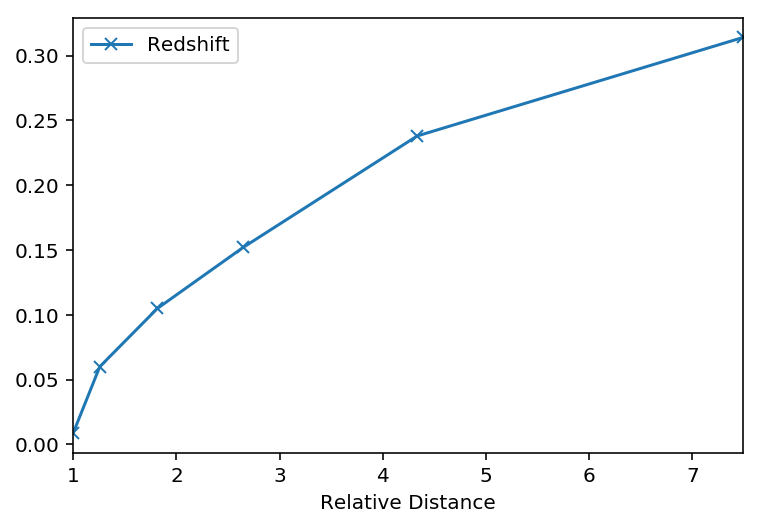

In [12]:
# Revised approximation of Hubble plot
df.plot(x='Relative Distance', y='Redshift', style='x-');